# Lab 5:Solutions



In [ ]:

import networkx as nx
import numpy as np


## Exercise 3 Weight
In class we learned that in many cases weight is important for measuring prestige and influence. 
We've also learned that all NetworkX functions we introduced have an option to include weight as a variable in the calculation. But why is it useful?

Let's try to test it by a series of exercises inspired by Exercise 4.1 in Menczer, Fortunato, Davis, 2020, *A First Course in Network Science*  

### Exercise 3.1 

Go to the French version of the Wikipedia article on 'network science' (https://fr.wikipedia.org/wiki/Science_des_réseaux).

We want to learn something about other Wikipedia pages (and other sources) to which this page points, so we are interested in the outgoing links of this page. 

How would you represent the relationships between this page and its sources if you were to create a network? Do not write any code yet, just think and make notes. 

Based on your modelling (and manual counting), what is the out-degree of this page in the Wikipedia network?


### *Answers 3.1:* 


You could treat Wikipedia pages as nodes (vertices) and hyperlinks included in "Science_des_réseaux" as links (edges). 

Similarly, you could treat all references (pages and academic publications, blog posts etc. as nodes). What you have to keep in mind in this scenario is that you might face potential problems with disambiguation & dead links, as illustrated by, for example: 


        Network Science, Börner, Katy, Sanyal, Soma & Vespignani, Alessandro. (2007). In Cronin, Blaise (Eds.), Annual Review of Information Science & Technology (Vol. 41, p. 537-607), chapter 12, Medford, NJ: Information Today, Inc./American Society for Information Science and Technology.

At the time of writing, the original link to a file on http://ivl.slis.indiana.edu/km/pub/2007-borner-arist.pdf was dead. An archived version (presumably of the same file) was provided on https://archive.wikiwix.com/cache/index2.php?url=http%3A%2F%2Fivl.slis.indiana.edu%2Fkm%2Fpub%2F2007-borner-arist.pdf%2Findex.html#federation=archive.wikiwix.com&tab=url. 

Would these two URLs be two nodes in your network, since they are two digital objects, or one, as they (presumably) represent the same content? This is one of decisions that needs to be taken when creating your dataset and it needs to be explained why you went for one or another. 

If we assume that only other Wikipedia pages are our nodes, than the out-degree of "Science_des_réseaux", at the time of writing, was 15 (including an empty French version of the page on Watts and Strogatz model).
 
This count excludes anything potentially included in "Liens externes" and "Bibliographie" as I assume that these two sections are unlikely to link other Wikipedia pages.  


### Exercise 3.2 

Go to the English version of the Wikipedia article on 'network science' (en.wikipedia.org/wiki/Network_science). 

Using the same approach as in Ex 3.2, what is the out-degree of this page? 

What the difference tells us about the nature of these two pages? 

Do you have weights included in your model? 
If yes, what are they? Why did you include them? Why are they useful?

If no, can you include them? How, what would they be?  Why they might be useful? 


### *Answers 3.2:* 

The out-degree of the English Wikipedia page "Network Science" is much higher than that of the French one. 

In the first two sections alone, there are already 30 links.

This difference might suggest that the English-speaking community of Wikipedia users is much more active than the French one. Would this reflect the general attitudes of French speakers towards Wikipedia? A lack of interest in contributing to Wikipedia among French-speaking network scientists? The dominance of the English language in academic writing, or something else? 
*Hint: I think it is something else, when you're done with your network visualisation you might be able to see what it it.* 

Consider ways in which these hypotheses could be tested.

Initially, I did not use weights, as it seemed that the French Wikipedia page mentioned and linked to other pages only once. However, in the English version, some pages are referenced multiple times, which could serve as a weight. 

For example, the Watts and Strogatz model is mentioned multiple times and is consequently linked from the section titled "Watts–Strogatz small-world model," from the image caption, and from the "Topology" section of the reference frame. 
This gives the page https://en.wikipedia.org/wiki/Watts–Strogatz_model a weight of 3.

The weights could be useful for measuring the importance of certain concepts within the narrative of the page. If a particular model or person is mentioned in multiple places, it might indicate significance. In the case of network analysis, we already know that the Watts-Strogatz model is important. 

However, it should be noted that the "Watts–Strogatz model" is mentioned seven times in the text as "Watts and Strogatz model" and "Watts-Strogatz model." Therefore, if we wanted to measure the importance of a concept rather than a page, we would need to decide how to count these mentions.





### Exercise 3.3 

Build two ego-networks for the articles (one for French 'Science_des_réseaux' and one for English 'Network_science').

The ego network consists of one node (the ego), all of its neighbors, and all of the links among them. The definition of a directed ego network is analogous, replacing neighbors by successors.

What is the node in the 'network science' ego network with the
maximum out-degree? And in 'Science des réseaux'? 

What is the node in the 'network science' ego network with the
maximum in-degree? And in 'Science des réseaux'? 

### *Answers 3.3:*

Let's start by importing some packages for webscrapping:
- Requests (https://pypi.org/project/requests/) 
- Beautiful Soup 4 (https://beautiful-soup-4.readthedocs.io/en/latest/)

*Note to self - this code needs to be run in me NAenv (with python 3.10.16), where I installed the following packages needed for this notebook:* 
- beautifulsoup4, version             4.13.3  
- requests, version                   2.32.3 

In [4]:
import requests
from bs4 import BeautifulSoup

Now let's define a function that is going to make a list of all links in this page. 
How are we going to choose which links to grab:
- We know in HTML links are always in `<a>` element 
- We know that  the internal wikipedia links always start with `/wiki/`
- We known that so we write the following:

In [5]:
# Function definition for get_links:
def get_links(url):
    response = requests.get(url) # Give me the entire HTML of the page on the URL I will provide
    response_text = response.content.decode('utf-8', errors='replace') # Make sure the content of this page is in UTF-8
    soup = BeautifulSoup(response_text, 'html.parser') # Create BeautifulSoup object which will allow you to exploit the tree structure of HTML
    links = []

    # Iterate through all <a> tags that have an 'href' attribute
    for link in soup.find_all('a', href=True):  
        href = link['href']  # Extract the href attribute value
        if href.startswith('/wiki/'): # Check whether the link is a Wikipedia article (internal link)
            links.append(href) # Add the link to the 'links' list
    return links


Let's create variables for our pages: 

In [6]:
NetworkScienceURL = 'https://en.wikipedia.org/wiki/Network_science'
ScienceDesReseauxURL = 'https://fr.wikipedia.org/wiki/Science_des_r%C3%A9seaux'


And call our function, let's assign the output into a new variable: 

In [7]:
NetworkScienceWikiLinks = get_links(NetworkScienceURL)
ScienceDesReseauxWikiLinks = get_links(ScienceDesReseauxURL)


And let's print the length of the output to see how many links we have: 

In [8]:
print("NetworkScienceWikiLinks", len(NetworkScienceWikiLinks))
print("ScienceDesReseauxWikiLinks", len(ScienceDesReseauxWikiLinks))

NetworkScienceWikiLinks 756
ScienceDesReseauxWikiLinks 63


Hmm... 754 links for `NetworkScience` and 63 links for `ScienceDesReseaux`. 

This sounds like a few more than what we counted manually. 

Let's check what's in there. 

I'll print `ScienceDesReseaux` as it's smaller. 

In [9]:
print("ScienceDesReseauxWikiLinks", ScienceDesReseauxWikiLinks)

ScienceDesReseauxWikiLinks ['/wiki/Wikip%C3%A9dia:Accueil_principal', '/wiki/Portail:Accueil', '/wiki/Sp%C3%A9cial:Page_au_hasard', '/wiki/Wikip%C3%A9dia:Contact', '/wiki/Aide:D%C3%A9buter', '/wiki/Aide:Accueil', '/wiki/Wikip%C3%A9dia:Accueil_de_la_communaut%C3%A9', '/wiki/Sp%C3%A9cial:Pages_sp%C3%A9ciales', '/wiki/Sp%C3%A9cial:Modifications_r%C3%A9centes', '/wiki/Wikip%C3%A9dia:Accueil_principal', '/wiki/Sp%C3%A9cial:Recherche', '/wiki/Aide:Premiers_pas', '/wiki/Sp%C3%A9cial:Mes_contributions', '/wiki/Sp%C3%A9cial:Mes_discussions', '/wiki/Science_des_r%C3%A9seaux', '/wiki/Discussion:Science_des_r%C3%A9seaux', '/wiki/Science_des_r%C3%A9seaux', '/wiki/Science_des_r%C3%A9seaux', '/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_r%C3%A9seaux', '/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_r%C3%A9seaux', '/wiki/Fichier:Circle-icons-genius.svg', '/wiki/Aide:%C3%89bauche', '/wiki/Science', '/wiki/Aide:Comment_modifier_une_page', '/wiki/Projet:Accueil', '/wiki/Fichier:A_network_of_Wikipedia_

OK, so we have some links to menu pages of Wikipedia and some duplicates. 
Let's try to clean it up by revising our function.

By examining the HTML output for our wikipedia page we can see that links to internal menu pages use ":", for example: 

- /wiki/Portail:Accueil
- /wiki/Sp%C3%A9cial:Citer/Science_des_r%C3%A9seaux


In [10]:
# I am not annotating this function again - only the change you've made, the rest is the same as in get_links
def get_links1(url):
    response = requests.get(url) 
    response_text = response.content.decode('utf-8', errors='replace')
    soup = BeautifulSoup(response_text, 'html.parser')
    links = []

    for link in soup.find_all('a', href=True):
        href = link['href']
        if href.startswith('/wiki/') and ":" not in href: # Add condition that colon ":" cannot be a part of the link
            links.append(href)
    return links
ScienceDesReseauxWikiLinks = get_links1(ScienceDesReseauxURL)
print("ScienceDesReseauxWikiLinks", len(ScienceDesReseauxWikiLinks))
print("ScienceDesReseauxWikiLinks", ScienceDesReseauxWikiLinks)

ScienceDesReseauxWikiLinks 26
ScienceDesReseauxWikiLinks ['/wiki/Science_des_r%C3%A9seaux', '/wiki/Science_des_r%C3%A9seaux', '/wiki/Science_des_r%C3%A9seaux', '/wiki/Science', '/wiki/Th%C3%A9orie_des_r%C3%A9seaux', '/wiki/%C3%89pid%C3%A9miologie', '/wiki/Science_de_l%27information', '/wiki/Sciences_cognitives', '/wiki/Th%C3%A9orie_des_graphes', '/wiki/Th%C3%A9orie_des_r%C3%A9seaux', '/wiki/Visualisation_des_donn%C3%A9es', '/wiki/Exploration_de_donn%C3%A9es', '/wiki/%C3%89mergence', '/wiki/Syst%C3%A8mes_dynamiques', '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si', '/wiki/Analyse_des_r%C3%A9seaux_sociaux', '/wiki/Syst%C3%A8me_multi-agents', '/wiki/Analyse_syst%C3%A9mique', '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si', '/wiki/International_Standard_Book_Number', '/wiki/National_Academies_Press', '/wiki/International_Standard_Book_Number', '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si', '/wiki/International_Standard_Book_Number', '/wiki/International_Standard_Book_Number', '/wiki/501c']


OK, so we got the number down to 26. That's still more than in our manual count. 
Is it because of duplicates, or self-loops or both?  

What we can also see by examining the output above is that there are some self-loops from "Science des réseaux" to "Science des réseaux", but we can keep them as they can be removed at the network processing stage. 

We can also see some duplicates, but we want to keep them to use them as weight. 

Let's create a list on unique values in our list to see what's going on there. 
We'll print a set made of the list to see quickly how many unique values we have: 



In [11]:
print("Unique values", len(set(ScienceDesReseauxWikiLinks)))

Unique values 18


OK, 18 is much closer to 15 we came up with first. So what's there we didn't count. 

In [12]:
print("Unique values", set(ScienceDesReseauxWikiLinks))

Unique values {'/wiki/501c', '/wiki/International_Standard_Book_Number', '/wiki/Syst%C3%A8mes_dynamiques', '/wiki/%C3%89pid%C3%A9miologie', '/wiki/National_Academies_Press', '/wiki/Exploration_de_donn%C3%A9es', '/wiki/Sciences_cognitives', '/wiki/Syst%C3%A8me_multi-agents', '/wiki/Analyse_syst%C3%A9mique', '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si', '/wiki/Th%C3%A9orie_des_r%C3%A9seaux', '/wiki/Th%C3%A9orie_des_graphes', '/wiki/Science_des_r%C3%A9seaux', '/wiki/%C3%89mergence', '/wiki/Visualisation_des_donn%C3%A9es', '/wiki/Analyse_des_r%C3%A9seaux_sociaux', '/wiki/Science_de_l%27information', '/wiki/Science'}


OK, so we still have a self-loop 
-  '/wiki/Science_des_r%C3%A9seaux'

Then it turns out that someone put a link to Wikipedia page of a publisher within bibliography: 
- '/wiki/National_Academies_Press'

and to ISBN:
- '/wiki/International_Standard_Book_Number'

And finally we also have: 
- '/wiki/501c' 

These are definitely not useful. 

To work around this, we can decide to simply exclude everything in the Bibliography section.

Let's redefine our function: 



In [13]:
# Annotating only changes: 
def get_links2(url):
    response = requests.get(url) 
    response_text = response.content.decode('utf-8', errors='replace')
    soup = BeautifulSoup(response_text, 'html.parser')
    links = []

    bibliography_section = soup.find('h3', {'id': 'Bibliographie'}) # Find the bibliography header in the document
    if bibliography_section:
    # Now, find the entire section containing the bibliography (so a parent element)
        parent_section = bibliography_section.find_parent()
    # Remove the parent section that contains the bibliography
        if parent_section:
            print(parent_section) #Show we the parent section
            parent_section.decompose()

    for link in soup.find_all('a', href=True):
        href = link['href']
        if href.startswith('/wiki/') and ":" not in href:
            links.append(href)
    return links


ScienceDesReseauxWikiLinks = get_links2(ScienceDesReseauxURL)
print("Unique values", len(set(ScienceDesReseauxWikiLinks)))
print("ScienceDesReseauxWikiLinks", set(ScienceDesReseauxWikiLinks))

<div class="mw-heading mw-heading3"><h3 id="Bibliographie">Bibliographie</h3><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a class="mw-editsection-visualeditor" href="/w/index.php?title=Science_des_r%C3%A9seaux&amp;veaction=edit&amp;section=6" title="Modifier la section : Bibliographie"><span>modifier</span></a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Science_des_r%C3%A9seaux&amp;action=edit&amp;section=6" title="Modifier le code source de la section : Bibliographie"><span>modifier le code</span></a><span class="mw-editsection-bracket">]</span></span></div>
Unique values 18
ScienceDesReseauxWikiLinks {'/wiki/501c', '/wiki/International_Standard_Book_Number', '/wiki/Syst%C3%A8mes_dynamiques', '/wiki/%C3%89pid%C3%A9miologie', '/wiki/National_Academies_Press', '/wiki/Exploration_de_donn%C3%A9es', '/wiki/Sciences_cognitives', '/wiki/Syst%C3%A8me_multi-agents', '/wiki/Analyse_syst%C3%A9mique', '/wiki/Albert-L%C3%A1szl%C3%B3_Bara

Still doesn't work, right?

It's because the actual content of the bibliography is not in this div it is in ul element that is a sibling of div. 

*Yes, yes, this is the time when you should look back at your notes about markup languages as HTML ans XML and remind yourself how to work with trees* 


In [14]:
# Only changes annotated 
def get_links3(url):
    response = requests.get(url) 
    response_text = response.content.decode('utf-8', errors='replace')
    soup = BeautifulSoup(response_text, 'html.parser')
    links = []

    bibliography_section = soup.find('h3', {'id': 'Bibliographie'})
    if bibliography_section:
        parent_section = bibliography_section.find_parent()
        # Find siblings of my parent and remove them 
        if parent_section:
            sib_sec = parent_section.find_next_sibling()
            sib_sec.decompose()

    for link in soup.find_all('a', href=True):
        href = link['href']
        if href.startswith('/wiki/') and ":" not in href:
            links.append(href)
    return links


ScienceDesReseauxWikiLinks3 = get_links3(ScienceDesReseauxURL)

print("Unique values", len(set(ScienceDesReseauxWikiLinks3)))
print("Set",set(ScienceDesReseauxWikiLinks3) )
print("List", ScienceDesReseauxWikiLinks3)

Unique values 16
Set {'/wiki/501c', '/wiki/Syst%C3%A8mes_dynamiques', '/wiki/%C3%89pid%C3%A9miologie', '/wiki/Exploration_de_donn%C3%A9es', '/wiki/Sciences_cognitives', '/wiki/Syst%C3%A8me_multi-agents', '/wiki/Analyse_syst%C3%A9mique', '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si', '/wiki/Th%C3%A9orie_des_r%C3%A9seaux', '/wiki/Th%C3%A9orie_des_graphes', '/wiki/Science_des_r%C3%A9seaux', '/wiki/%C3%89mergence', '/wiki/Visualisation_des_donn%C3%A9es', '/wiki/Analyse_des_r%C3%A9seaux_sociaux', '/wiki/Science_de_l%27information', '/wiki/Science'}
List ['/wiki/Science_des_r%C3%A9seaux', '/wiki/Science_des_r%C3%A9seaux', '/wiki/Science_des_r%C3%A9seaux', '/wiki/Science', '/wiki/Th%C3%A9orie_des_r%C3%A9seaux', '/wiki/%C3%89pid%C3%A9miologie', '/wiki/Science_de_l%27information', '/wiki/Sciences_cognitives', '/wiki/Th%C3%A9orie_des_graphes', '/wiki/Th%C3%A9orie_des_r%C3%A9seaux', '/wiki/Visualisation_des_donn%C3%A9es', '/wiki/Exploration_de_donn%C3%A9es', '/wiki/%C3%89mergence', '/wiki/Syst%C3

Perfect, we have 16 instead of 15 and the difference is due to the self-loop. We can live with this, I think.

Let's create a network now. 

In [15]:
from collections import Counter

# List of linked Wikipedia pages
links = ScienceDesReseauxWikiLinks3

# Count occurrences of each page
link_counts = Counter(links)

# Create edge list with weights
edges = [(link, count) for link, count in link_counts.items()]

# Display the weighted edge list
print(edges)

[('/wiki/Science_des_r%C3%A9seaux', 3), ('/wiki/Science', 1), ('/wiki/Th%C3%A9orie_des_r%C3%A9seaux', 2), ('/wiki/%C3%89pid%C3%A9miologie', 1), ('/wiki/Science_de_l%27information', 1), ('/wiki/Sciences_cognitives', 1), ('/wiki/Th%C3%A9orie_des_graphes', 1), ('/wiki/Visualisation_des_donn%C3%A9es', 1), ('/wiki/Exploration_de_donn%C3%A9es', 1), ('/wiki/%C3%89mergence', 1), ('/wiki/Syst%C3%A8mes_dynamiques', 1), ('/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si', 1), ('/wiki/Analyse_des_r%C3%A9seaux_sociaux', 1), ('/wiki/Syst%C3%A8me_multi-agents', 1), ('/wiki/Analyse_syst%C3%A9mique', 1), ('/wiki/501c', 1)]


DiGraph with 16 nodes and 16 edges
[('/wiki/Science_des_r%C3%A9seaux', '/wiki/Science_des_r%C3%A9seaux'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Science'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Th%C3%A9orie_des_r%C3%A9seaux'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/%C3%89pid%C3%A9miologie'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Science_de_l%27information'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Sciences_cognitives'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Th%C3%A9orie_des_graphes'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Visualisation_des_donn%C3%A9es'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Exploration_de_donn%C3%A9es'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/%C3%89mergence'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Syst%C3%A8mes_dynamiques'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Analyse_des_r%C3%A9seaux_sociaux'), ('/wiki/Science_des_r%C3%A9seaux', '/wiki/Syst%C3%

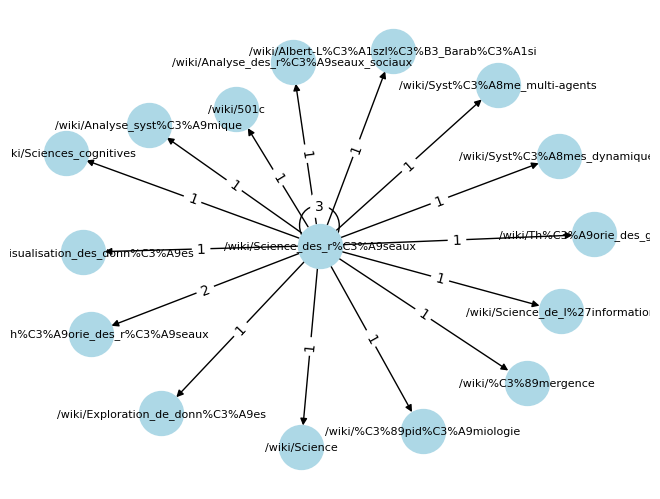

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
myGraph = nx.DiGraph()

# Add weighted edges
for link, weight in edges:
    myGraph.add_edge("/wiki/Science_des_r%C3%A9seaux", link, weight=weight) #  We are naming our main node here with the page's URI

print(myGraph)
print(myGraph.edges)
print(myGraph.nodes)



# Draw the graph
pos = nx.spring_layout(myGraph)  # Layout for better visualization
nx.draw(myGraph, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=8)
labels = nx.get_edge_attributes(myGraph, "weight")
nx.draw_networkx_edge_labels(myGraph, pos, edge_labels=labels)

plt.show()

In [ ]:
print(myGraph.out_degree)
print(myGraph.in_degree)

max_out_degree = max(myGraph.out_degree(), key=lambda x: x[1])
max_in_degree = max(myGraph.in_degree(), key=lambda x: x[1])

print(max_out_degree)
print(max_in_degree)

OK, so in and out degree is not what we'd be really interested in, we would be rather interested in weight of the links, right?

How would we do it? 



In [18]:
# Get weighted in-degree and out-degree
print("Out-degree (weighted):", dict(myGraph.out_degree(weight="weight")))
print("In-degree (weighted):", dict(myGraph.in_degree(weight="weight")))

Out-degree (weighted): {'/wiki/Science_des_r%C3%A9seaux': 19, '/wiki/Science': 0, '/wiki/Th%C3%A9orie_des_r%C3%A9seaux': 0, '/wiki/%C3%89pid%C3%A9miologie': 0, '/wiki/Science_de_l%27information': 0, '/wiki/Sciences_cognitives': 0, '/wiki/Th%C3%A9orie_des_graphes': 0, '/wiki/Visualisation_des_donn%C3%A9es': 0, '/wiki/Exploration_de_donn%C3%A9es': 0, '/wiki/%C3%89mergence': 0, '/wiki/Syst%C3%A8mes_dynamiques': 0, '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si': 0, '/wiki/Analyse_des_r%C3%A9seaux_sociaux': 0, '/wiki/Syst%C3%A8me_multi-agents': 0, '/wiki/Analyse_syst%C3%A9mique': 0, '/wiki/501c': 0}
In-degree (weighted): {'/wiki/Science_des_r%C3%A9seaux': 3, '/wiki/Science': 1, '/wiki/Th%C3%A9orie_des_r%C3%A9seaux': 2, '/wiki/%C3%89pid%C3%A9miologie': 1, '/wiki/Science_de_l%27information': 1, '/wiki/Sciences_cognitives': 1, '/wiki/Th%C3%A9orie_des_graphes': 1, '/wiki/Visualisation_des_donn%C3%A9es': 1, '/wiki/Exploration_de_donn%C3%A9es': 1, '/wiki/%C3%89mergence': 1, '/wiki/Syst%C3%A8mes_dy

Looks better now. Let's remove the self-loops and calculate max again: 

In [21]:

myGraph.remove_edges_from(nx.selfloop_edges(myGraph))
print("Out-degree (weighted):", dict(myGraph.out_degree(weight="weight")))
print("In-degree (weighted):", dict(myGraph.in_degree(weight="weight")))
max_out_degree_w = max(myGraph.out_degree(weight="weight"), key=lambda x: x[1])
max_in_degree_w = max(myGraph.in_degree(weight="weight"), key=lambda x: x[1])

print(max_out_degree_w)
print(max_in_degree_w)


Out-degree (weighted): {'/wiki/Science_des_r%C3%A9seaux': 16, '/wiki/Science': 0, '/wiki/Th%C3%A9orie_des_r%C3%A9seaux': 0, '/wiki/%C3%89pid%C3%A9miologie': 0, '/wiki/Science_de_l%27information': 0, '/wiki/Sciences_cognitives': 0, '/wiki/Th%C3%A9orie_des_graphes': 0, '/wiki/Visualisation_des_donn%C3%A9es': 0, '/wiki/Exploration_de_donn%C3%A9es': 0, '/wiki/%C3%89mergence': 0, '/wiki/Syst%C3%A8mes_dynamiques': 0, '/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si': 0, '/wiki/Analyse_des_r%C3%A9seaux_sociaux': 0, '/wiki/Syst%C3%A8me_multi-agents': 0, '/wiki/Analyse_syst%C3%A9mique': 0, '/wiki/501c': 0}
In-degree (weighted): {'/wiki/Science_des_r%C3%A9seaux': 0, '/wiki/Science': 1, '/wiki/Th%C3%A9orie_des_r%C3%A9seaux': 2, '/wiki/%C3%89pid%C3%A9miologie': 1, '/wiki/Science_de_l%27information': 1, '/wiki/Sciences_cognitives': 1, '/wiki/Th%C3%A9orie_des_graphes': 1, '/wiki/Visualisation_des_donn%C3%A9es': 1, '/wiki/Exploration_de_donn%C3%A9es': 1, '/wiki/%C3%89mergence': 1, '/wiki/Syst%C3%A8mes_dy

## Success!! 

Now you can apply the same logic for the English version, but the code will require some tweaking. 

*Tip: The English wikipedia page links to the wikipedia page for DOI (Digital Object Identifier), so DOI would appear as the highest degree node. How would you get rid of it?*